In [40]:
import os, shutil

original_dataset_dir = '/Users/tristansaldanha/Documents/Funk/GitHub/notes/datasets/dogs-vs-cats/train'

base_dir = '/Users/tristansaldanha/Documents/Funk/GitHub/notes/datasets/dogs-v-cats'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [41]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [42]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 17, 17, 128)     

In [43]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [44]:
# preprocessing with some libraries

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150), batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

# working with batch generators

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [45]:
# fit generator, similar to fit
'''
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
    '''

'\nhistory = model.fit_generator(\n    train_generator,\n    steps_per_epoch=100,\n    epochs=30,\n    validation_data=validation_generator,\n    validation_steps=50)\n    '

In [46]:
# Save the models

model.save('cats_and_dogs_small_1.h5')

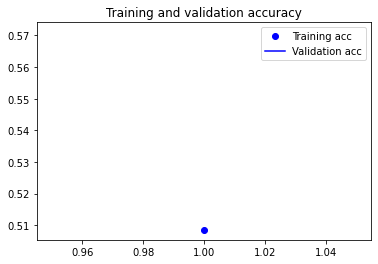

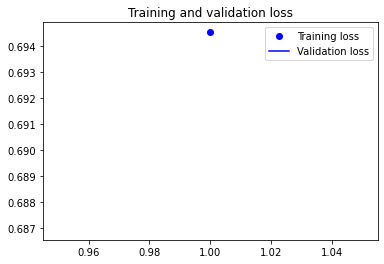

In [47]:
# Plotting loss curves

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Overfitting: training loss rises, accuracy flatlines

Fighting overfitting with Data Augmentation

In [48]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

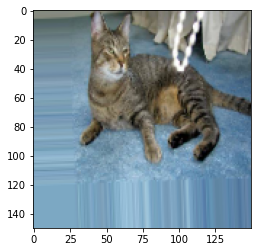

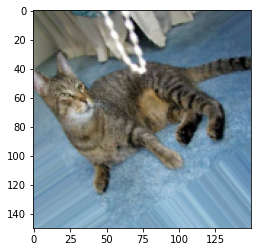

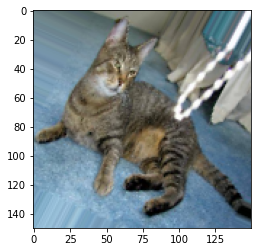

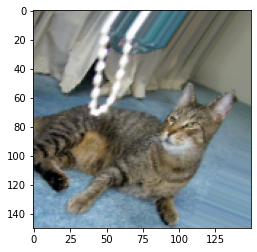

In [49]:
# Using the augmented generator

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [50]:
# Let's also add a dropout layer

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [57]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

history = model.fit(
train_generator,
#steps_per_epoch=100,
steps_per_epoch=train_generator.n//train_generator.batch_size,
epochs=100,
validation_data=validation_generator,
#validation_steps=50
validation_steps=validation_generator.n//validation_generator.batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 29s 472ms/step - loss: 0.6521 - acc: 0.6052 - val_loss: 0.6928 - val_acc: 0.5615
Epoch 2/100
62/62 [==============================] - 30s 488ms/step - loss: 0.6556 - acc: 0.5930 - val_loss: 0.6175 - val_acc: 0.6573
Epoch 3/100
62/62 [==============================] - 29s 470ms/step - loss: 0.6351 - acc: 0.6275 - val_loss: 0.6099 - val_acc: 0.6552
Epoch 4/100
62/62 [==============================] - 30s 481ms/step - loss: 0.6151 - acc: 0.6580 - val_loss: 0.6536 - val_acc: 0.6089
Epoch 5/100
62/62 [==============================] - 29s 462ms/step - loss: 0.6162 - acc: 0.6570 - val_loss: 0.6040 - val_acc: 0.6704
Epoch 6/100
62/62 [==============================] - 29s 465ms/step - loss: 0.6044 - acc: 0.6636 - val_loss: 0.5856 - val_acc: 0.6804
Epoch 7/100
62/62 [==============================] - 30s 488ms/step - loss: 0.6023 - acc: 0.6733 - val_loss: 0.5

62/62 [==============================] - 32s 511ms/step - loss: 0.4526 - acc: 0.7830 - val_loss: 0.4878 - val_acc: 0.7762
Epoch 62/100
62/62 [==============================] - 32s 519ms/step - loss: 0.4449 - acc: 0.7967 - val_loss: 0.5696 - val_acc: 0.7157
Epoch 63/100
62/62 [==============================] - 33s 536ms/step - loss: 0.4582 - acc: 0.7810 - val_loss: 0.4504 - val_acc: 0.7883
Epoch 64/100
62/62 [==============================] - 34s 548ms/step - loss: 0.4462 - acc: 0.7815 - val_loss: 0.4340 - val_acc: 0.8024
Epoch 65/100
62/62 [==============================] - 33s 532ms/step - loss: 0.4466 - acc: 0.7937 - val_loss: 0.4412 - val_acc: 0.7933
Epoch 66/100
62/62 [==============================] - 32s 510ms/step - loss: 0.4439 - acc: 0.7912 - val_loss: 0.4928 - val_acc: 0.7742
Epoch 67/100
62/62 [==============================] - 31s 504ms/step - loss: 0.4434 - acc: 0.8008 - val_loss: 0.4424 - val_acc: 0.7954
Epoch 68/100
62/62 [==============================] - 32s 523ms/step

In [52]:
model.save('cats_and_dogs_small_2.h5')

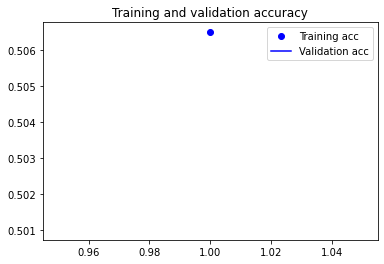

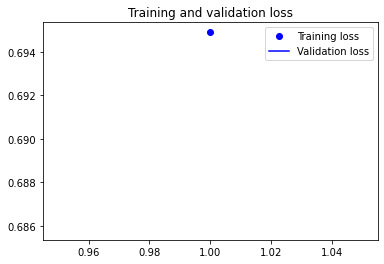

In [53]:
# Plotting loss curves

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()